# Notebook for trying out the TK03 model and the Elongation/Inclination Method of correcting for inclination shallowing

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib as mpl
from matplotlib import cm

%config InlineBackend.figure_format = 'retina'

In [2]:
Cutface_specimens = pd.read_csv('../data/Pmag/cutface/specimens.txt', sep='\t', header=1)

Cutface_lat = 47.73055
Cutface_lon = -90.44128

In [3]:
specimens_lt_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='lt') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_lt_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='lt') & (Cutface_specimens['dir_tilt_correction']==100)]

specimens_mt_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='mt') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_mt_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='mt') & (Cutface_specimens['dir_tilt_correction']==100)]

specimens_ht_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='ht') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_ht_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='ht') & (Cutface_specimens['dir_tilt_correction']==100)]

In [4]:
mean_lt = ipmag.fisher_mean(specimens_lt_geo['dir_dec'].tolist(),specimens_lt_geo['dir_inc'].tolist())
mean_mt = ipmag.fisher_mean(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist())
mean_ht = ipmag.fisher_mean(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist())
mean_ht

{'dec': 285.10893622254355,
 'inc': 29.67624976213083,
 'n': 81,
 'r': 78.44177849626185,
 'k': 31.271725252524657,
 'alpha95': 2.85866289800105,
 'csd': 14.48468643344844}

## Get directions from tk03 model

In [5]:
tk03_directions=ipmag.tk03(n=1000,dec=0, lat=30)

In [6]:
def get_decs(directions):
    return [item[0] for item in directions]
def get_incs(directions):
    return [item[1] for item in directions]


In [7]:
tk03_decs=get_decs(tk03_directions)
tk03_incs=get_incs(tk03_directions)
tk03_mean_data=ipmag.fisher_mean(tk03_decs,tk03_incs)

### Plot original directions

No handles with labels found to put in legend.


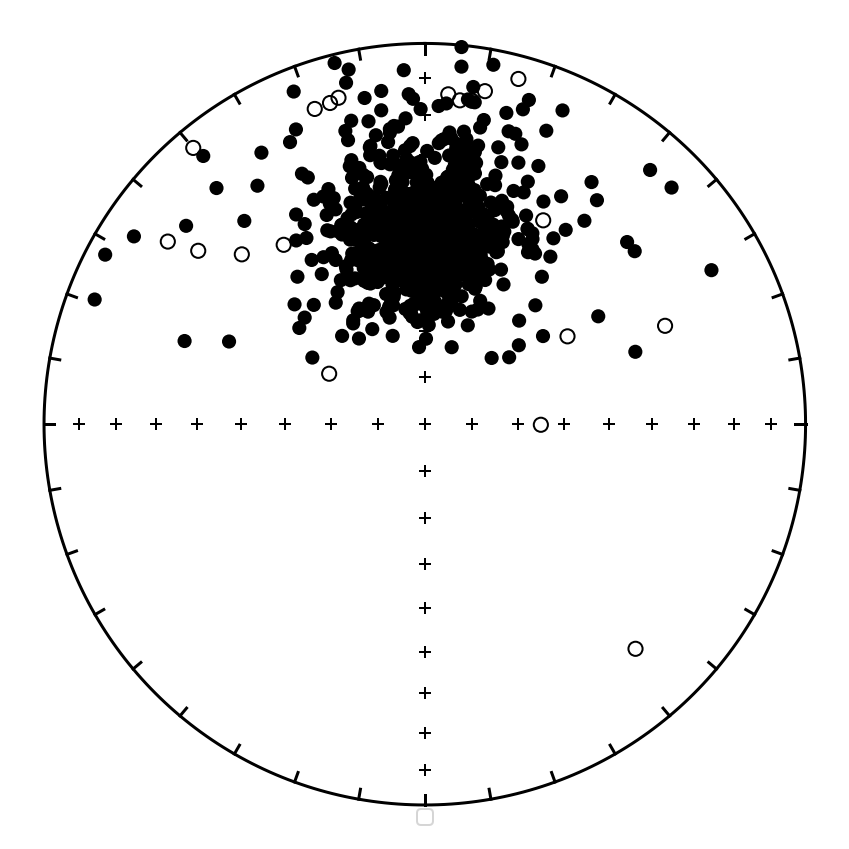

In [8]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(tk03_decs,tk03_incs,markersize=50)
plt.savefig('../figures/tk03_original.pdf')
plt.legend(loc=8)
plt.show()

In [9]:
tk03_mean_data

{'dec': 359.3205243266789,
 'inc': 46.903320620199324,
 'n': 1000,
 'r': 944.6555919521456,
 'k': 18.050604121308876,
 'alpha95': 1.0748269348037836,
 'csd': 19.06510265750787}

### Squish the inclinations with various factors of $f$ and plot

No handles with labels found to put in legend.


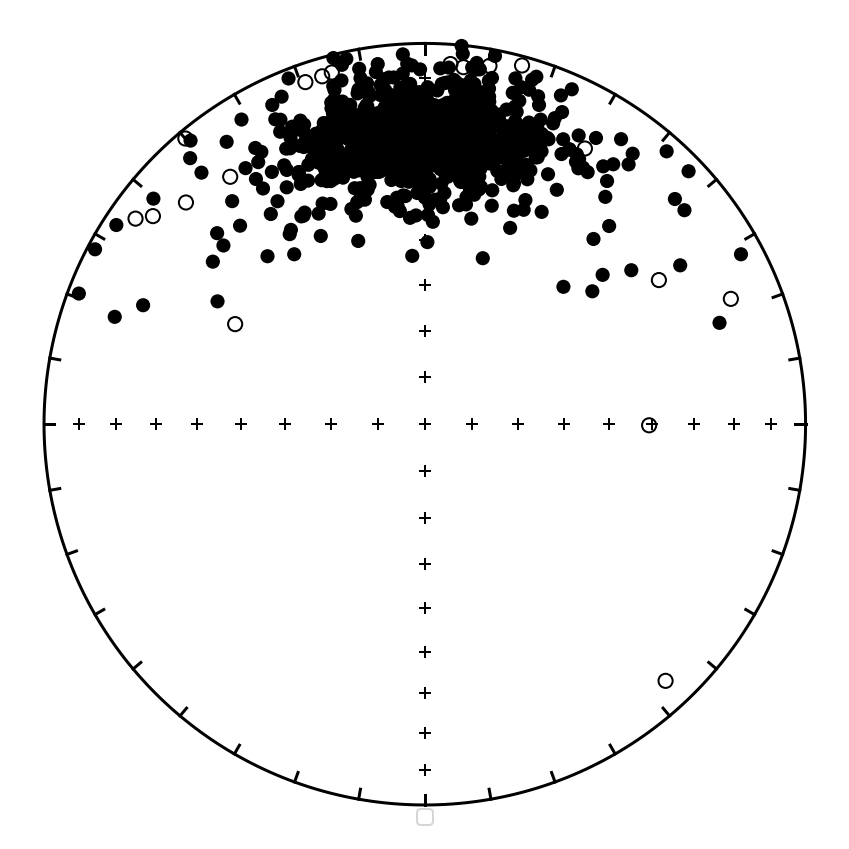

In [10]:
tk03_incs_squished=ipmag.squish(tk03_incs, 0.4)
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(tk03_decs,tk03_incs_squished,markersize=50)
plt.legend(loc=8)
plt.savefig('../figures/tk03_squished.pdf')
plt.show()

In [11]:
ipmag.fisher_mean(tk03_decs,tk03_incs_squished)

{'dec': 359.28811974264573,
 'inc': 24.34511574846368,
 'n': 1000,
 'r': 951.0576131648097,
 'k': 20.41175481212339,
 'alpha95': 1.0073416772213162,
 'csd': 17.928536818662636}

## Try out $ e/i $ method and compare to original plot

Bootstrapping.... be patient

The original inclination was: 24.556423023742347

The corrected inclination is: 53.52683046061555
with bootstrapped confidence bounds of: 49.544939821054356 to 57.563726939625994
and elongation parameter of: 1.5921261579844959
The flattening factor is: 0.3249999999999994


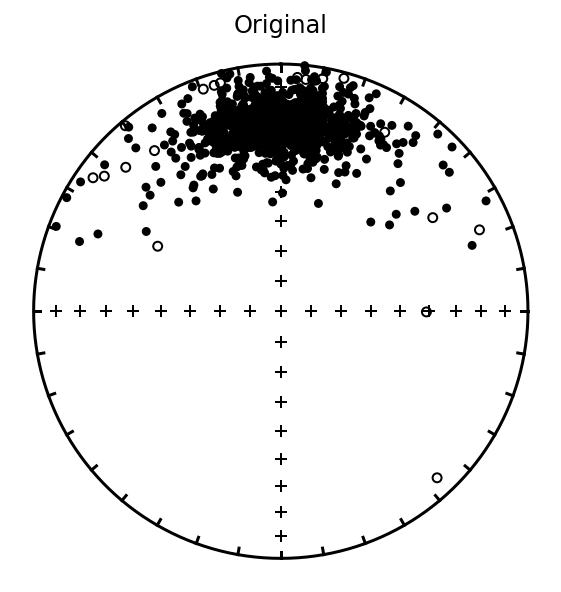

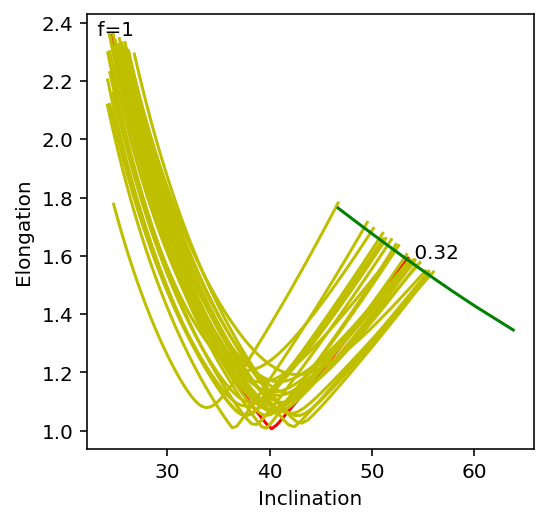

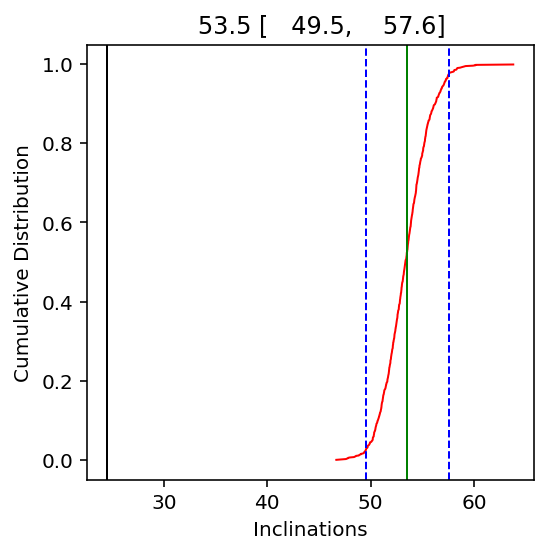

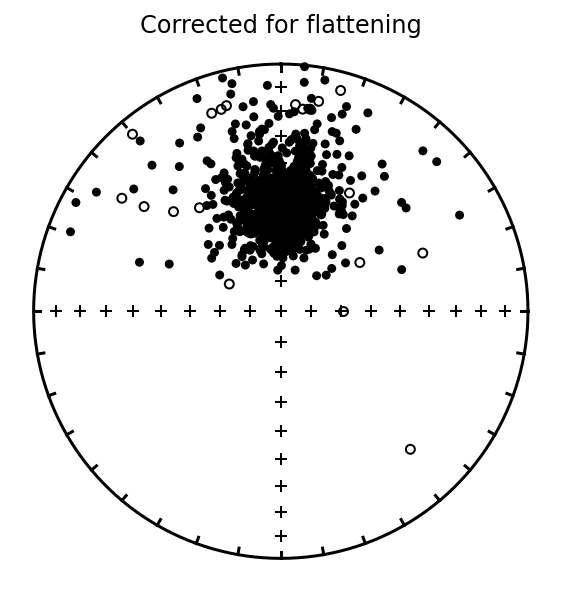

In [12]:
tk03_data_nested=ipmag.make_di_block(tk03_decs,tk03_incs_squished)

ipmag.find_ei(np.array(tk03_data_nested),save=True)
plt.savefig('../figures/tk03.pdf')

## Apply to Cutface data

In [13]:
specimens_ht_tc.head()

,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,dir_dang,dir_mad_free,meas_step_max,meas_step_min,meas_step_unit,analysts,instrument_codes,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,location,site,specimen_name
7,CF-10a,CF-10a_LP-DIR-T,CF-10,NaN,ht,283.4,25.4,3.0,7.0,100.0,0.0,10.1,950.0,937.0,K,NaN,hargrave 2020-11-24 21:43:43,pmagpy-4.2.50: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-TILT,g,NaN,NaN,Cutface Creek,CF,CF-10a
19,CF-11a,CF-11a_LP-DIR-T,CF-11,NaN,ht,285.1,34.9,3.0,7.0,100.0,0.0,13.2,950.0,937.0,K,NaN,hargrave 2020-11-22 16:19:20,pmagpy-4.2.50: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-TILT,g,NaN,NaN,Cutface Creek,CF,CF-11a
21,CF-12a,CF-12a_LP-DIR-T,CF-12,NaN,ht,269.8,32.1,3.0,4.0,100.0,0.0,20.8,947.0,937.0,K,NaN,hargrave 2020-11-22 16:20:48,pmagpy-4.2.50: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-TILT,g,NaN,NaN,Cutface Creek,CF,CF-12a
32,CF-13a,CF-13a_LP-DIR-T,CF-13,NaN,ht,264.1,24.7,3.0,7.0,100.0,0.0,12.1,950.0,937.0,K,NaN,hargrave 2020-11-24 21:45:14,pmagpy-4.2.50: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-TILT,g,NaN,NaN,Cutface Creek,CF,CF-13a
47,CF-14a,CF-14a_LP-DIR-T,CF-14,NaN,ht,280.0,14.3,3.0,7.0,100.0,0.0,5.7,950.0,937.0,K,NaN,hargrave 2020-11-24 21:46:50,pmagpy-4.2.50: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR-TILT,g,NaN,NaN,Cutface Creek,CF,CF-14a


In [14]:
ht_tc_di_block = ipmag.make_di_block(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist())

Bootstrapping.... be patient



AttributeError: 'list' object has no attribute 'transpose'

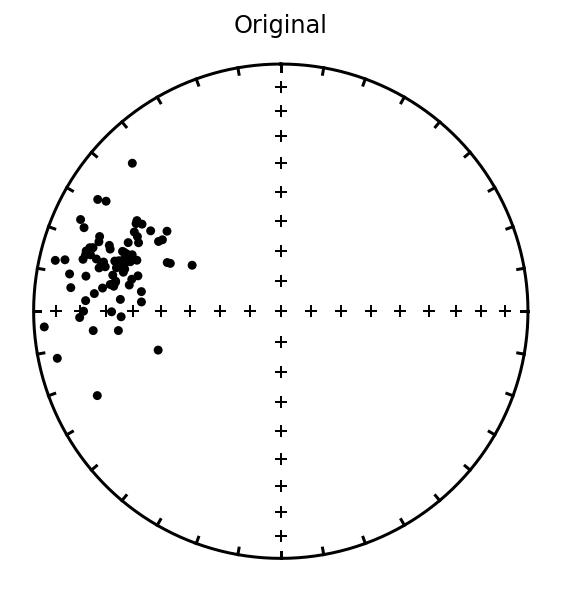

In [15]:
ipmag.find_ei(ht_tc_di_block)

In [ ]:
specimens_ht_tc = specimens_ht_tc.head(1)

In [ ]:
ipmag.find_ei(np.array(ht_tc_di_block))